# 5. Linear Support Vector Machine
The best method from the last notebook (4: Training multiple models) was LinearSVC. Therefore, this notebook continues with that method and visualizes the outcome to see what's going on.

## Preprocessing
First, lets do the necessary importing and processing to be able to work with the data.

In [1]:
import pandas as pd
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from preprocessing import PreProcessor

pp = PreProcessor()

df = pd.read_csv('darkweb/data/agora.csv')

categories_main = df[' Category'].apply(lambda x: x.split('/')[0])
descriptions = df[' Item'] + " " + df[' Item Description']
descriptions_preprocessed = descriptions.apply(lambda d: pp.preprocess(str(d)))

df = pd.DataFrame({'Category': categories_main, 'Item Description': descriptions_preprocessed})
df = df[pd.notnull(df['Item Description'])] # no empty descriptions
df = df[df.groupby('Category')['Category'].transform(len) > 1] # only categories that appear more than once

df['category_id'] = df['Category'].factorize()[0]
category_id_df = df[['Category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Category']].values)

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2))
features = tfidf.fit_transform(df['Item Description'])
labels = df.category_id

df.head()

,Category,Item Description,category_id
0,Services,month huluplu gift code month huluplu code wor...,0
1,Services,pay tv sky uk sky germani hd tv much cccam ser...,0
2,Services,offici account creator extrem tag submiss fix ...,0
3,Services,vpn tor sock tutori setup vpn tor sock super s...,0
4,Services,facebook hack guid guid teach hack facebook ac...,0


## Train the model
Now, we can train the LinearSVC model.

In [3]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Confusion matrix
After we trained and validated the model, we can plot a confusion matrix to visualize actual and predicted data. From this, we can see that for example: a lot of 'Information' is mispredicted as 'Info' and the category 'Other' also causes a lot of confusion. The fact we can see this very easily is helpfull. Maybe we should combine 'Info' and 'Information' into one category. And maybe it is helpfull to eliminate the 'Other' category.

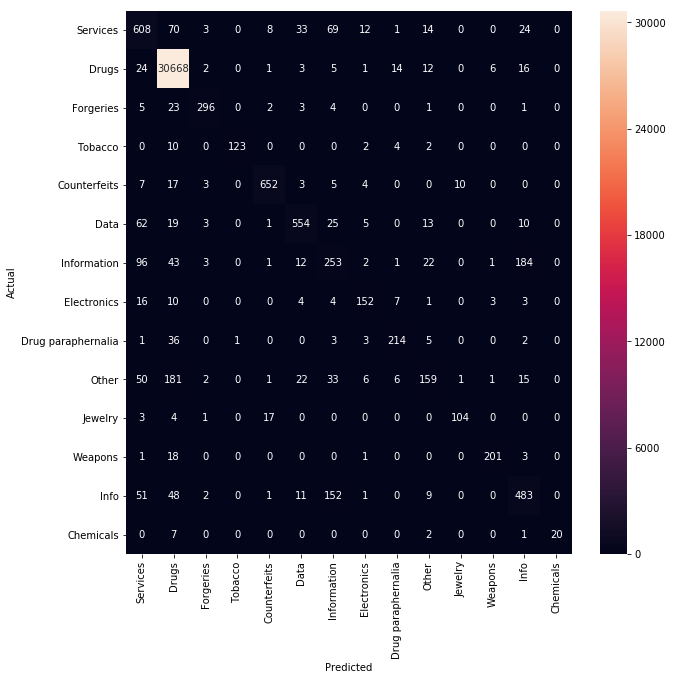

In [5]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Category.values, yticklabels=category_id_df.Category.values)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Mispredictions
Now that we can see what categories are mostly mispredicted, we want to be able to see what exact descriptions are wrongly predicted to possibly determine why this happened. That is exactly what we will do now: display all mispredicted descriptions.

In [6]:
from IPython.display import display

for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 10:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Category', 'Item Description']])
      print('')

'Drugs' predicted as 'Services' : 24 examples.


,Category,Item Description
101015,Drugs,h custom btc h
26596,Drugs,rat hotel book penthous suit
108345,Drugs,g custom list custom list fe requir g reship g...
35906,Drugs,abc amazon servic get anyth discount amazon re...
21870,Drugs,c flight book
25439,Drugs,smoke hotel book
19511,Drugs,flight book
22059,Drugs,yeahbuddi hotel book
70104,Drugs,tmobil hotel book
109150,Drugs,user hotel book



'Data' predicted as 'Services' : 62 examples.


,Category,Item Description
99606,Data,x unlimit card bank account ronal custom x unl...
40727,Data,fresh dump guarante valid zip code tt sell fre...
49962,Data,amazon complex pack tutori earn big amazon com...
38470,Data,hot high qualiti instagram follow also accept ...
25538,Data,power ddo tool market power ddo tool market en...
58011,Data,php mailer sender script bulk spam php mailer ...
25639,Data,spotifi lifetim account great deal know sell a...
82803,Data,paypal starter transfer hour replac team speci...
66981,Data,data gener super list cc fullz paypal bank acc...
64230,Data,minecraft account receiv access minecraft account



'Information' predicted as 'Services' : 96 examples.


,Category,Item Description
39629,Information,custom colpo custom colpo
39108,Information,money gener onlin revenu youtub new method pag...
4504,Information,western union card exploit includ card guid we...
39605,Information,uniqu multipl way make money onlin incom strea...
4507,Information,check ip blacklist paypal check ip blacklist p...
39625,Information,get rich custom custom
39030,Information,invest pornpro lifetim vouch top rate get serv...
39670,Information,millionair youtub high qualiti view also accep...
39679,Information,get rich make botnet guid show creat botnet ma...
38990,Information,jumpstart youtub view also accept bigger amoun...



'Electronics' predicted as 'Services' : 16 examples.


,Category,Item Description
2314,Electronics,sapphir r gb gddr mine scrypt litecoin bitcoin...
43956,Electronics,amazon refund anyth amazon amazon refund pay g...
70411,Electronics,keydemon usb keylogg cm resembl standard keybo...
2356,Electronics,xfx radeon hd r graphich card xfx radeon hd r ...
2344,Electronics,bodybuildingcom card servic item retail price ...
10852,Electronics,hack facebook account easi hack facebook accou...
91401,Electronics,raffl soni play station portabl game per ticke...
59734,Electronics,voic changer burner phone dual sim chang voic ...
2353,Electronics,sapphir vaporx r x graphic card sapphir vaporx...
48239,Electronics,custom amazon cass custom amazon cass



'Other' predicted as 'Services' : 50 examples.


,Category,Item Description
70869,Other,request paypal servic buy list order use paypa...
40003,Other,make buck monstersoci softwar httpmonstersocia...
67871,Other,starbuck gift card sell theyr back card add ap...
40028,Other,trade high qualiti real facebook like also acc...
40011,Other,make bank day earn day introduct page overview...
12163,Other,track owner phone number track owner phone number
39951,Other,get car want completli legal per month straigh...
39912,Other,gold gener everi minut autopilot earn everi mi...
39949,Other,badass autopilot copypast day system autopilot...
33728,Other,set comb pick x comb lock pick design pick pin...



'Info' predicted as 'Services' : 51 examples.


,Category,Item Description
26906,Info,merchant code instor card merchant code instor...
99027,Info,credit card hack method dorksexploitusingeasi ...
64669,Info,basic hack penetr test basic hack penetr test ...
29678,Info,open unlimit eu anon bank account open unlimit...
29327,Info,set pgp key easili imag includ set pgp key eas...
65364,Info,atm hack tutori atm hack tutori
49144,Info,add site social bookmark add site social bookm...
99038,Info,bin searh bank cc bin searh bank cc
27110,Info,special botnet tutori setup botnet look set bo...
21146,Info,k per day system hype bs discov make per day o...



'Services' predicted as 'Drugs' : 70 examples.


,Category,Item Description
56,Services,car theori test holland cbr connect high posit...
62472,Services,zeu bot manualfact zeu bot manualfact
103763,Services,aud best price free express stealth bitbank ne...
57216,Services,buy bitcoin uk bank transfer fast escrow fee h...
57276,Services,custom x uk fullz
71156,Services,amazon refund pay get full refund pm detail am...
64183,Services,apart rental
71146,Services,start busi singapor singapor rank st eas busi ...
61500,Services,marijuana grow room consult harvest best bud h...
62593,Services,vip express addon order vip express addon orde...



'Forgeries' predicted as 'Drugs' : 23 examples.


,Category,Item Description
92738,Forgeries,real current us car licens plate sale free shi...
81307,Forgeries,custom magic
81327,Forgeries,custom viglut x x
99195,Forgeries,custom order winnyblu custom order user winnyb...
55700,Forgeries,illinoi driver licens holouvscannablemicroprin...
66171,Forgeries,nan
66186,Forgeries,custom crekpeip ct
97051,Forgeries,daili free sampl prove qualiti list free sampl
21807,Forgeries,custom surygi redo
71171,Forgeries,custom plwime x



'Tobacco' predicted as 'Drugs' : 10 examples.


,Category,Item Description
23146,Tobacco,g synthet cannabi smoke blend spice k hebral i...
81742,Tobacco,tobacco spice eam x fe special spring freedom ...
34877,Tobacco,awesom glass weed pipe killer clown super cool...
49486,Tobacco,tobacco spice eam fe special spring freedom sa...
100679,Tobacco,classi jobon butan torch lighter classi lighte...
910,Tobacco,x joint pre roll joint roll g haze golden virg...
23138,Tobacco,custom g crash custom crash g smoke blend
63279,Tobacco,gram sampl tobacco spice gram tobacco spice st...
40046,Tobacco,custom list ago kit black ago kit
97345,Tobacco,malboro gold origin cig x free ndd uk vendor m...



'Counterfeits' predicted as 'Drugs' : 17 examples.


,Category,Item Description
106148,Counterfeits,k list k
32641,Counterfeits,deal hg
1712,Counterfeits,custom list b httpagorahooawayyfoeonionplrcaxe...
82563,Counterfeits,deal freedom x euro
64016,Counterfeits,counterfeit usd fakeasanyth order mani good im...
92854,Counterfeits,good paper piec good paper high qualiti rough ...
82557,Counterfeits,postag lose ttt list cover dhl postag charg re...
78277,Counterfeits,gbp note note pound note gbp sampl select note...
100645,Counterfeits,custom list special list
109120,Counterfeits,telefonul anti interceptar afla acum daca tele...



'Data' predicted as 'Drugs' : 19 examples.


,Category,Item Description
46981,Data,hackat och kapat traderakonto med minst positi...
93256,Data,gift day smtp hi nakamoto gift today smtp acco...
99389,Data,far mad crowd victorian england independ heads...
51426,Data,pendriv whonixporteustor instal plugnplay noob...
67457,Data,hot tub time machin malfunct time machin ski r...
65019,Data,miss meadow prim schoolteach miss meadow kati ...
102095,Data,thejerm sotwar case need
25732,Data,spotfi hi
67395,Data,star war episod iv new hope luke skywalk join ...
99386,Data,second best exot marigold hotel best exot mari...



'Information' predicted as 'Drugs' : 43 examples.


,Category,Item Description
92655,Information,lost mojo get keep get back lose mojo gener mo...
52874,Information,freebi giveaway first lucki limit feedbackforu...
58771,Information,jorg cervantesultim growvideo jorg cervant ult...
4196,Information,heroin product home step step best guid make h...
2083,Information,pto portabl trade occup would like enough mone...
51523,Information,paperless trail paperless trail dont buy messag
55630,Information,lyserg acid product guid ron paul dearli miss ...
4620,Information,build laser listen devic build laser listen devic
4346,Information,track full specif track full specif
4647,Information,ibogain rite passag movi ibogain natur occur p...



'Electronics' predicted as 'Drugs' : 10 examples.


,Category,Item Description
10810,Electronics,scope x zoom mini microscop new perfect check ...
61283,Electronics,soni playstat white gb bnib bnib soni ps gb gl...
48246,Electronics,uniqu amazon refund pay get full refund pm det...
30650,Electronics,cannon ct constanttemperatur viscoc bath devic...
2337,Electronics,itt litton anvi anav gen night vision goggl nv...
30652,Electronics,high qualiti nema stepper motor high qualiti n...
30657,Electronics,custom list sad custom list sad
2329,Electronics,benzen l benzen l
70413,Electronics,nest learn thermostat hey everybodi today im g...
43958,Electronics,ascent vapor highest technolog vape look ultim...



'Drug paraphernalia' predicted as 'Drugs' : 36 examples.


,Category,Item Description
27816,Drug paraphernalia,dct ml atom thread liquid oil vapor rare refil...
98717,Drug paraphernalia,frost glass doubl snorter one nostril isnt enough
109138,Drug paraphernalia,steril alcohol swab inject ct steril alcohol p...
96991,Drug paraphernalia,grater grind grater grind herb nut
28398,Drug paraphernalia,poker chip pill case special offer take pill t...
98720,Drug paraphernalia,mini coolbombspeci special price anoth bargain...
27827,Drug paraphernalia,davinci vapor possibl best person portabl vape...
108295,Drug paraphernalia,handblown glass pipe spoon style bowl pack str...
106772,Drug paraphernalia,job french light slow burrn roll papper pack j...
2361,Drug paraphernalia,heavi duti meth pipe made usa high qualiti han...



'Other' predicted as 'Drugs' : 181 examples.


,Category,Item Description
4907,Other,extra ship cost usd
65293,Other,custom list steve discuss
106845,Other,custom list lexu amnz
73551,Other,poster endless beauti mid size cm length x cm ...
76359,Other,express ship order list unless told special ci...
12058,Other,custom happ g mdma g coke express post
45066,Other,juici g npp g test prop g test base g tren ace...
33747,Other,dexamfetamin mg origin pill hey peepz origin d...
50704,Other,custom do
98977,Other,custom tark custom tark



'Weapons' predicted as 'Drugs' : 18 examples.


,Category,Item Description
109271,Weapons,cobra classic italian firework pc final earli ...
51511,Weapons,fulli automat mac recent came across someth do...
33949,Weapons,versatil rifl packag fe full escrow chaotic ne...
33918,Weapons,luger mm pc vacuum seal luger mm pc vacuum sea...
105590,Weapons,custom old boy ship item week send track
50356,Weapons,custom mr mc custom order mr mc
95345,Weapons,mossberg maverik gaug pumpgun pumpgun kalib gu...
50347,Weapons,custom gunlov custom list gunlov
109338,Weapons,loud ass firework attent pyro got someth speci...
33953,Weapons,hidden list good custom hidden list necessari ...



'Info' predicted as 'Drugs' : 48 examples.


,Category,Item Description
98043,Info,beyond within lsd stori beyond within lsd stor...
62559,Info,erot stori ebook page sexi stori tast book sto...
49482,Info,seek magic mushroom life magazin seek magic mu...
26887,Info,stimul toler withdraw neurotoxc prevent guid e...
71110,Info,straight monkey busi go kid
21171,Info,best bitcoin scam peopl ballz love bitcoin you...
96921,Info,sexercis sexercis b cum sex provid form exerci...
26926,Info,drugslist lesson marketplac secur taken lightl...
65354,Info,po cashier worker oper job explain po cashier ...
22683,Info,end fed peopl think fed indispens institut wit...



'Jewelry' predicted as 'Counterfeits' : 17 examples.


,Category,Item Description
12408,Jewelry,swiss rolex daydat diamond yellow gold replica...
12404,Jewelry,swiss rolex daydat diamond replica real retail...
29632,Jewelry,patek philipp calatrava rlsteel aaa awesom tim...
5044,Jewelry,burberri woman bag replica collect materi pu l...
100157,Jewelry,rayban sunglass rayban sunglass use good condit
45164,Jewelry,custom list ace nike yeezi ii shoe gray replic...
12402,Jewelry,cuttom list lss moncler jacket fallwint man ht...
4943,Jewelry,tom ford tf sunglass replica tom ford tf sungl...
100153,Jewelry,burberri sunglass burberri sunglass use good c...
78949,Jewelry,rolex submarin blueblu rolex submarin blue dia...



'Services' predicted as 'Data' : 33 examples.


,Category,Item Description
15447,Services,marriott discount form day item allow holder r...
21362,Services,netflix lifetim account account lifetim accoun...
96899,Services,crack password applic crack password applic
81791,Services,still poor buy credit card paypal cash buy cre...
14321,Services,manga studio ex v window manga studio ex v win...
14314,Services,microsoft visual studio ultim microsoft visual...
71142,Services,wwe network lifetim freebi wwe network lifetim...
23,Services,learn anonym complet anonym leav trace must pe...
81178,Services,x premium netflix account promo premium netfli...
71135,Services,dunkin donut lifetim freebi dunkin donut lifet...



'Information' predicted as 'Data' : 12 examples.


,Category,Item Description
1917,Information,fastestgrow career complet guidebook major job...
40766,Information,begin html css dummi fullcolor friendli guid g...
4545,Information,never get bust vol bonu sd qualiti awesom vide...
39004,Information,rag rich multipl way make money onlin incom st...
4188,Information,anonym email welcom secretsquirrel guid send a...
4472,Information,encrypt skype messag use pidgin encrypt skype ...
39696,Information,next buy credit card buy credit card paypal ca...
4636,Information,prevent dn leak use vpn prevent dn leak use vp...
39734,Information,solut altern silk road updat may altern silk r...
39733,Information,treasur day blackhat whitehat uniqu method kda...



'Other' predicted as 'Data' : 22 examples.


,Category,Item Description
12347,Other,unauthor bank code get list unauthor bank code
12277,Other,afroman frobama head state tracklist intro hit...
39935,Other,start mine custom noego custom noego
12283,Other,origin lifetim account account lifetim account...
59095,Other,one sport channel one sport channel internet l...
45128,Other,sale btsport account lifetim freebi btsport ac...
104161,Other,who nailin paylin file name who nailin paylinw...
67865,Other,superman vs elit p imdb rate format mp genr an...
12256,Other,babysitt wife threesom format mpg file size mb...
39907,Other,silver buy credit card buy credit card paypal ...



'Info' predicted as 'Data' : 11 examples.


,Category,Item Description
65228,Info,ccleaner pro busi ccleaner pro busi ccleaner r...
29334,Info,hack administr account guest account hack admi...
33150,Info,rosetta stone pc mac languag dont pay full pri...
45790,Info,million australia email databas million austra...
62607,Info,milion german email databas target email milio...
62509,Info,hack window xp extremetech sinchak hack window...
31781,Info,account allinon dummi onestop account refer pa...
98408,Info,xstar premium porn account lifetimefreebi best...
66116,Info,onion websit list onion websit list best youll...
71910,Info,get differ type account porn minecraft xbox et...



'Services' predicted as 'Information' : 69 examples.


,Category,Item Description
117,Services,vault market invit code save sell invit code w...
37171,Services,prosper custom list custom list
23295,Services,paypal cashout ninja secretcashout paypal with...
32185,Services,paypal ninja secret content stealth paypal cas...
37178,Services,millionair torrent money page descript person ...
60935,Services,eh cours escap hide surviv th th march day nig...
37157,Services,wealth custom custom
37318,Services,easi bankrol get unsatur way get tell guy meth...
69343,Services,conquer sharecash newbi daili conquer sharecas...
104607,Services,get itemmail drop tutorialusa uk eu intern car...



'Data' predicted as 'Information' : 25 examples.


,Category,Item Description
38422,Data,cash conquer sharecash newbi daili conquer sha...
38519,Data,make bankrol never lose paypal disput guid hot...
38526,Data,huge payment becom money make bomb paypal titl...
38446,Data,stone dell comput inch touch notebook amazon r...
38416,Data,easi money easili make month autopilot ebook s...
1434,Data,brainwav gener crack digit download sent via p...
38423,Data,peso paypal win disput ultim paypal guid paypa...
38509,Data,futur prospect comprehens guid network secur c...
38529,Data,filthi rich excel revenu way make money becom ...
33385,Data,fit peni innov method enlarg peni muscl simult...



'Other' predicted as 'Information' : 33 examples.


,Category,Item Description
39915,Other,easi money made one weekend unsatur effici mon...
12386,Other,offici guid sext rule sexual text sext sexual ...
12266,Other,make btc deepweb everi day guarante wo bullshi...
39978,Other,cut debt make week torrent page descript metho...
39954,Other,market monet made one weekend unsatur effici m...
12173,Other,easili paypal cashout paypal fund bank account...
105885,Other,papa john pizza code papa john code get papa j...
40013,Other,prosperti learn make daili everyon one dream o...
12211,Other,persephon quest entheogen origin religion fasc...
39963,Other,money anti dox dox tutori cheap must anti dox ...



'Info' predicted as 'Information' : 152 examples.


,Category,Item Description
49103,Info,deal difficult peopl lesson quick read base mc...
27176,Info,creat stealth paypal account creat stealth pay...
27145,Info,card tutori instor card everyth want know inst...
64638,Info,virtual world crimin fusion virtual realiti cr...
26902,Info,definit paypal cashout method ultim definit gu...
96915,Info,incred sex incred sex perk w wilson million us...
64655,Info,android secur privaci encrypt pack android sec...
29312,Info,hack wireless internet dummi book format pdf e...
29695,Info,secret crap right way play secret crap right w...
29745,Info,mitak monet read insid huge new vendor discoun...



'Services' predicted as 'Electronics' : 12 examples.


,Category,Item Description
34,Services,insid forex trade signal make thousand daili y...
69757,Services,usb bootabl bitcoin wallet onlin offlin storag...
21098,Services,spi camera key ring share facebook share email...
89121,Services,custom list x optu anon sim card hello custom ...
85461,Services,iphon new box iphon new box
85460,Services,samsung galaxi new box samsung galaxi new box
49052,Services,password crack freei decod network wireless st...
21061,Services,rob wifi network unlock bg autohack pc requir ...
21053,Services,usa version ford roll code grabber open ok lot...
32206,Services,set drop point uniqu new way set drop point fi...



'Drugs' predicted as 'Drug paraphernalia' : 14 examples.


,Category,Item Description
59907,Drugs,x cc syring cc syring needl
20361,Drugs,g vapor dri herb wax oil ago g vapor standard ...
108812,Drugs,volcano digit vapor storz bickel list follow f...
47369,Drugs,whispr vapor product featur complet portabl wi...
24207,Drugs,snuff kit bit n piec need night snuff
6718,Drugs,small glass spoon style pipe add order add exi...
23988,Drugs,snuffmast snuff bullet machin new attent limit...
40312,Drugs,glass bubbler handblown pack strain amaz deal ...
108720,Drugs,g x g dig scale precis matter gm digit pocket ...
6450,Drugs,ziplock bag perfect dealer au stock ever got s...



'Services' predicted as 'Other' : 14 examples.


,Category,Item Description
71133,Services,lol na account lifetim freebi lol na account l...
71126,Services,rank websit higher googl best seo rank websit ...
37311,Services,claim custom hack custom hack custom databas r...
71129,Services,origin account lifetim freebi origin plu accou...
37283,Services,start make money custom delray custom delray
23344,Services,list fee list fee
36562,Services,custom lise gh custom lise gh
14310,Services,track label x usp track label pm bulk
21127,Services,hous key cut machin bw key cut machin beauti s...
37176,Services,get car want privat brows unoffici user guid t...



'Drugs' predicted as 'Other' : 12 examples.


,Category,Item Description
27710,Drugs,custom list b order unless ask
89695,Drugs,custom list charken wish command good sir
5112,Drugs,trackedsign ship normal post track trace ship ...
95782,Drugs,customsil joe custom order silent joe
46006,Drugs,higg special order medibl
97792,Drugs,custom list r oz cola g
78899,Drugs,custom custom mr x
87281,Drugs,custom focus habit strip
105887,Drugs,custom order thor sub long dont want overnight...
26011,Drugs,ship fee express ship order order boobear



'Data' predicted as 'Other' : 13 examples.


,Category,Item Description
51431,Data,starbuck egift card code starbuck gift card co...
83658,Data,classic vid nerdi girl fuck format wmv file si...
33392,Data,natur born killer p plot misadventur mickey ma...
66999,Data,mega porn account websit best sell take look l...
33389,Data,afroman drunk n high titl compos time let get ...
38480,Data,rich custom custom
83629,Data,famili incest sex parti format avi file size m...
33380,Data,afroman afrohol even better time track list di...
38403,Data,sexi real twitter follow also accept differ am...
33384,Data,afroman good time year tracklist got high craz...



'Information' predicted as 'Other' : 22 examples.


,Category,Item Description
39724,Information,stone custom onlnrmob custom onlnrmob
4677,Information,password list list million word combin
39683,Information,donat ticket make fortun onlin page descript g...
39685,Information,silver custom deal sheepymarket custom deal sh...
39628,Information,jumpstart wireless network secur signal commun...
39065,Information,pay bill ultim money make guid page descript p...
92674,Information,ill make offer cant refus insid busi tip forme...
17836,Information,new fresh us ident guid tire creditor hound ti...
39007,Information,deuc custom list princefresh custom list princ...
39722,Information,load real twitter follow also accept differ am...



'Counterfeits' predicted as 'Jewelry' : 10 examples.


,Category,Item Description
73332,Counterfeits,gucci gg gold len sunglass replica gucci gg go...
73330,Counterfeits,ray ban rb aviat flip sunglass replica ray ban...
92575,Counterfeits,gucci classic flipflop man replica gucci class...
5230,Counterfeits,herm steve messeng bag replica herm steve mess...
73335,Counterfeits,prada sprn sunglass replica prada sprn sunglas...
73130,Counterfeits,gucci ggf brown sunglass replica gucci ggf tor...
5386,Counterfeits,gucci ya replica ya
1702,Counterfeits,cartier k pink gold necklac replica cartier k ...
5229,Counterfeits,lv eugeni wallet replica lv eugeni wallet repl...
73319,Counterfeits,custom list b httpagorahooawayyfoeonionpxmmeys...



'Services' predicted as 'Info' : 24 examples.


,Category,Item Description
54684,Services,great invest opportun great invest opportun li...
81177,Services,best method spread file guid learn spread file...
37165,Services,custom ebook pack custom ebook pack send nice ...
72,Services,intern dummi letter want dummi letter add comm...
49044,Services,amazon refund scam price amazon refund scam qu...
81781,Services,make per month fiverr discov make per month fi...
48,Services,hide anyth book name hide anyth michael connor...
37182,Services,earn ban ebook steal book ban ebook steal book...
1095,Services,per hour uk game site exclus guid show take ad...
31733,Services,googl hack content chapter search googl set pr...



'Drugs' predicted as 'Info' : 16 examples.


,Category,Item Description
48968,Drugs,cocain handbook page everyth know cocain handb...
12478,Drugs,instruct make geltab incl mould geltab form pr...
49602,Drugs,uniqu cocain handbook page everyth know cocain...
52820,Drugs,dummi post
27908,Drugs,earn usd usdmonth legal earn usd usdmonth hone...
44822,Drugs,cocain handbook essenti refer david lee cocain...
6898,Drugs,grow medicin marijuana todd mccormick grow med...
63114,Drugs,brain complet mind develop work keep sharp bra...
76203,Drugs,custom list wolf custom list wolf
59762,Drugs,lose weight live healthi complet guid design w...



'Data' predicted as 'Info' : 10 examples.


,Category,Item Description
71817,Data,font huge collect font file size mb aprox form...
38385,Data,iwork key need dmg iwork appl product suit eas...
73209,Data,drug beginn guid grow marijuana drug beginn gu...
32708,Data,begin program python dummi paperback page sept...
49998,Data,cocain handbook page everyth know cocain handb...
32771,Data,amazon unlimit money amazon unlimit money welc...
50052,Data,deepweb onion site list march onion list clean...
25540,Data,iwork key need iwork appl product suit easiest...
28024,Data,full movi hobbit battl five armi new dvd scree...
66972,Data,avast internet secur v incl licens till bestse...



'Information' predicted as 'Info' : 184 examples.


,Category,Item Description
4530,Information,chain sock proxi tor carder must guid learn ch...
1821,Information,complet idiot guid amaz sex peopl know there s...
40761,Information,hack gmail first book unlock true power behind...
2202,Information,incendiari advanc improvis explos potenti comm...
103526,Information,garden eden snu voogelbreind garden eden shama...
55617,Information,add updat carder scienc page knowledg much detail
4425,Information,two guid easi mephedron mmc synthesi two guid ...
4236,Information,everi possibl way gener web traffic everi poss...
39697,Information,make plastic explos bleach ebook make plastic ...
1984,Information,big book secret hide place biggest best book c...



'Other' predicted as 'Info' : 15 examples.


,Category,Item Description
12153,Other,paypal toolkit pro secret inform ebay paypal d...
45020,Other,opensourc lab build hardwar reduc research cos...
12334,Other,question answer congest heart failur question ...
12126,Other,updat list non vbv non msc bin get updat list ...
45056,Other,get googl adsens approv thing realli work ill ...
45093,Other,ebay secret reveal best kept ebay secret final...
12349,Other,easi way make money hr updat make money within...
12096,Other,great sex game coupl steve great sex game coup...
12282,Other,goldmin amazon guid amazon refund guid go look...
12232,Other,bank transfer done right way guid show make ba...


## Keeping score
By looking at different calculations from the confusion matrix outcome, we can take a look at different scores for the model for each of the categories.

In [7]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred, target_names=df['Category'].unique()))

                    precision    recall  f1-score   support

          Services       0.66      0.72      0.69       842
             Drugs       0.98      1.00      0.99     30752
         Forgeries       0.94      0.88      0.91       335
           Tobacco       0.99      0.87      0.93       141
      Counterfeits       0.95      0.93      0.94       701
              Data       0.86      0.80      0.83       692
       Information       0.46      0.41      0.43       618
       Electronics       0.80      0.76      0.78       200
Drug paraphernalia       0.87      0.81      0.84       265
             Other       0.66      0.33      0.44       477
           Jewelry       0.90      0.81      0.85       129
           Weapons       0.95      0.90      0.92       224
              Info       0.65      0.64      0.64       758
         Chemicals       1.00      0.67      0.80        30

         micro avg       0.95      0.95      0.95     36164
         macro avg       0.83      0.7